<a href="https://colab.research.google.com/github/GulfamMalik6/Number_Plate_Detection_Using_YOLOv8/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 692.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 16.8 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
import cv2
from matplotlib import pyplot as plt
import easyocr
import matplotlib.image as mpimg

In [ ]:
rf = Roboflow(api_key="J2i0T6688rYAWqouoqfp")
project = rf.workspace().project("license-plates-detection-anpr")
model = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...


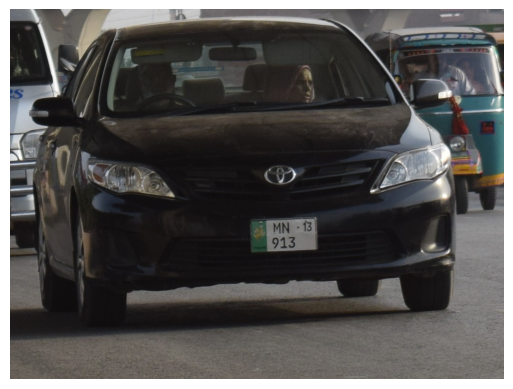

In [ ]:
imgpath = '/DSC_1011.JPG'
img = mpimg.imread(imgpath)
plt.imshow(img)
plt.axis('off')
plt.show()
prediction_data = model.predict(imgpath, confidence=60, overlap=30).json()

In [ ]:
predictions = prediction_data['predictions'][0]

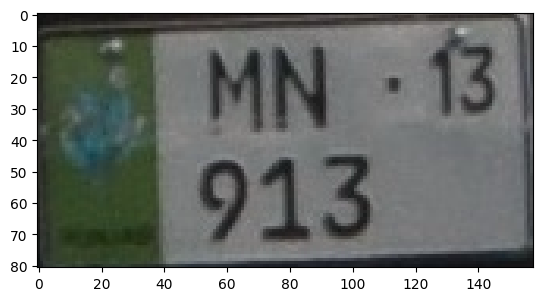

In [ ]:
x = predictions['x']
y = predictions['y']
width = predictions['width']
height = predictions['height']

image = cv2.imread(imgpath)

x = int(x - width / 2)
y = int(y - height / 2)

cropped_image = image[y:y+height, x:x+width]
plt.imshow(cropped_image)

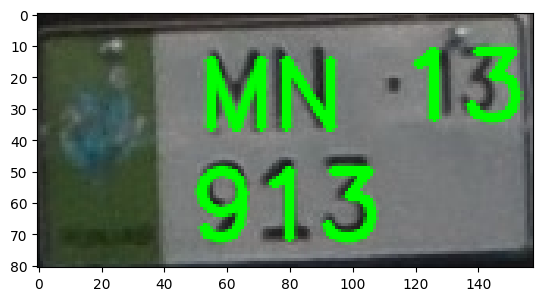

Detected Text 1: MN
Detected Text 2: 13
Detected Text 3: 913


In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1.0
font_thickness = 2

detected_texts = []

for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])

    text = detection[1]

    text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
    text_width = text_size[0]
    text_height = text_size[1]
    text_x = (top_left[0] + bottom_right[0] - text_width) // 2
    text_y = (top_left[1] + bottom_right[1] + text_height) // 2

    img = cv2.putText(cropped_image, text, (text_x, text_y), font, font_scale, (0, 255, 0), font_thickness, cv2.LINE_AA)

    detected_texts.append(text)

plt.imshow(img)
plt.show()

for i, text in enumerate(detected_texts):
    print(f"Detected Text {i + 1}: {text}")
